### Logistic Regression

This is the first post in a series that will lead to an implementation of a deep artificial neural network from scratch. This post will focus on the mathematical foundations behind the logistic regression. Throughout we will work with a training set $\mathbf{X}_{train} \in \mathbb{R}^{n\times m}$ with $n$ training samples with $m$ dimensions. We will be trying to solve a binary decision problem $\mathbf{y}_i\in\{0,1\}$. 

#### Logistic Regression as a Single-Layer Neural Network

Something that was not immediately clear to me when I started machine learning was how a logistic regression could be seen as a single-layer- or a single-neuron neural network. In this context, a single-layer neural network has an input layer for the training samples, one set of weights $\mathbf{\theta}\in \mathbb{R}^{m}$, an activation function (the sigmoid in this case) and an output (layer).

The image below shows a typical representation of a fully-connected neural network with one hidden layer. The next chapter will go into more detail about these, for now you can just accept this representation as a given. 
 
<img src="imgs/logreg/FCSLNN.png" width="500">
<br><br>
Instead we will focus on one neuron and see how it relates to a logistic regression:
<br><br>
<img src="imgs/logreg/FCLSNN_and_logreg.png" width="800">

The image (a) below shows the elements of the more familiar ANN visualisation that together constitute a logistic regression. Here we make the assumption that the activation function used is the sigmoid function (see next paragraph). Image (b) shows a visual representation of a logistic regression, using the typical ANN symbols.

#### The Bernoulli Distribution

We are now turning to our classification problem. <br>
Given a training set: $\{(\mathbf{x}_1, y_1), ..., (\mathbf{x}_n, ..., y_n)\},  \mathbf{x} \in \mathbb{R}^m, y\in \{0,1\} $, we are trying to find a function that captures the probability of each $x$ belonging to a certain class $y$ (under the assumption that the training samples are independent $p(y^1, ... y^n | \mathbf{x}^1, ... \mathbf{x}^n) = \prod^N_{i=1}p(y^i|\mathbf{x}^i)$): 

\begin{equation}
\mathcal{f}_{\theta}(\mathbf{x}) \rightarrow p(y|x) \rightarrow \hat{y}
\end{equation}

The Bernoulli distribution is the to-go choice for these binary classification problems:

\begin{equation}
p(y=c) = \begin{cases} 
a,& \text{if }c=1\\
1-a,& \text{if }c=0\\
\end{cases}
\end{equation}
or: 
\begin{equation}
p(y=c) = a^c(1-a)^{1-c}
\end{equation}

We are now trying to find a function
\begin{equation}
\mathcal{f}_{\theta}(\mathbf{x}) \rightarrow a,
\end{equation}
so that we can model the probabilities (raw predictions):
\begin{equation}
p(y=c|x, \theta) = \begin{cases} 
\mathcal{f}_{\theta}(\mathbf{x}),& \text{if }c=1\\
1-\mathcal{f}_{\theta},& \text{if }c=0\\
\end{cases}
\end{equation}
or: 
\begin{equation}
p(y=c|x, \theta) = \mathcal{f}_{\theta}(\mathbf{x})^c(1-\mathcal{f}_{\theta}(\mathbf{x}))^{1-c}
\end{equation}

The final classification $\hat{y}$ can then be determined by setting a decision boundary, typically at p=0.5, or $\hat{y} = \text{max}(p(y=0|\mathbf{x}), p(y=1|\mathbf{x}))$

#### The Sigmoid Function
Logistic regression is an approach to modeling this function $\mathcal{f}_{\theta}$ with the familiar regression equation $x^{\top} \theta$. Since the outcome of $\mathcal{f}_{\theta}$ should lie between 0 and 1, for it to yield a valid distribution, the sigmoidal function $\mathcal{g}$ is introduced:

\begin{equation}
\mathcal{g}(\alpha) = \frac{1}{1 + e^{-\alpha}}
\end{equation}

It's sometimes called a squashing function, as it converts outcomes $-\infty \rightarrow 0$ and $\infty \rightarrow 1$, exactly what is needed. We can now define $\mathcal{f}$:

\begin{equation}
\mathcal{f}_\theta(x) = \mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})
\end{equation}

#### Max Likelikhood Estimation (MLE) of the Parameters $\vec{\theta}$
Now that we have established our models predictive functions, we need to figure out how to optimize with respect to $\theta$. Using Max Likelihood Estimation, we find the following sub-problem:

\begin{equation}
    \underset{\theta}{\text{argmax}} \prod^N_{i=1} p(y_i|x_i, \theta)
\end{equation}
\begin{equation}
    = \prod^N_{i=1} \mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})^{y^i}(1-\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta}))^{1-y^i}
\end{equation}

We can transform this to the negative log-likelihood to make optimization easier:

\begin{equation}
   \underset{\theta}{\text{argmin}} -\sum_{i=1}^N \log \left (\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})^{y^i} \right) + \log \left ( \left ( 1-\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})  \right )^{1-y^i} \right ) \\ 
      = -\sum_{i=1}^N {y^i} \log \left (\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta}) \right) + (1-y^i) \log \left  ( 1-\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})  \right )
\end{equation}

This final equation is also known as the cross-entropy loss and this is the loss function used to optimise a logistic regerssion classifier.

##### Gradient-based Optimization
Now that we have derived the loss function, we can start by optimizing it with gradient-based methods. 

\begin{equation}
L(\theta) = -\sum_{i=1}^N {y^i} \log \left (\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta}) \right) + (1-y^i) \log \left  ( 1-\mathcal{g}(\mathbf{x}^{\top} \mathbf{\theta})  \right )
\end{equation} 

We will find the argmin at $\nabla L(\theta^*) = 0$. We start by initializing the weights $\mathbf{\theta}$ randomly and updating them iteratively, using: 

\begin{equation}
    \mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} - \nabla L(\theta)
\end{equation}


The gradient of the loss function over the parameters $\theta$ can be found as follows:

\begin{equation}
\frac{\delta L(\mathbf{\theta})}{\delta \mathbf{\theta}} =  -\sum_{i=1}^N   \left [ y^i \frac{1}{\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)}\frac{\delta \mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)}{\delta \mathbf{\theta}}  + (1-y^i) \frac{1}{1-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)} (-\frac{\delta \mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)}{\delta \theta}) \right] 
\end{equation}

\begin{equation} =  -\sum_{i=1}^N   \left [ y^i \frac{1}{\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)} - (1-y^i) \frac{1}{1-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)} \right] 
(\frac{\delta \mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)}{\delta \theta})
\end{equation}

Since $\mathcal{g}(\alpha) = \frac{1}{1+e^{-\alpha}} \rightarrow \frac{\delta\mathcal{g}}{\delta \alpha} = \mathcal{g(\alpha)(1-g(\alpha))}$, we can further resolve this:

\begin{equation} =  -\sum_{i=1}^N   \left [ y^i \frac{1}{\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)} - (1-y^i) \frac{1}{1-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)} \right] 
\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)(1-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i))\frac{\delta \mathbf{\theta}^{\top}\mathbf{x}_i}{\delta \mathbf{\theta}}
\end{equation}

\begin{equation}
= - \sum_{i=1}^N   \left [y^i( 1-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)) - (1 - y^i) \mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i)  \right ]x_i
\end{equation}

\begin{equation}
= - \sum_{i=1}^N   \left [y_i-\mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x}_i) \right ] x_i
\end{equation}

Which simply comes down to the difference between our raw prediction and the true label times the input vector for every training observation:
\begin{equation}
= - \sum_{i=1}^N (y_i - \mathcal{f}_\theta(\mathbf{x}_i))\mathbf{x}_i
\end{equation}

We can now find the optimal parameters $\mathbf{\theta}^*$ by iteratively updating $\theta$ until convergence: 

\begin{equation}
 \mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} + \sum_{i=1}^N (y_i - \mathcal{f}_{\theta}(\mathbf{x}_i))\mathbf{x}_i
\end{equation}

#### Conclusion
<ul>
    <li>We have a training set: $\{(\mathbf{x}_1, y_1), ..., (\mathbf{x}_n, ..., y_n)\},  \mathbf{x} \in \mathbb{R}^m, y\in \{0,1\} $</li>
    <li>Raw predictions are made with $\mathcal{f}_\theta(\mathbf{x}) = \mathcal{g}(\mathbf{\theta}^{\top}\mathbf{x})$</li>
    <li>Which relies on a sigmoid function: $\mathcal{g}(\alpha) = \frac{1}{1 + e^{-\alpha}}$</li>
    <li>The model-parameters $\mathbf{\theta} \in \mathbb{R}^m$ are randomly initialized</li>
    <li>We update the parameters iteratively until convergence using: $\mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} + \sum_{i=1}^N (y_i - \mathcal{f}_{\theta}(\mathbf{x}_i))\mathbf{x}_i$
</ul>

#### An intuitive approach to the Cross-Entropy Loss Function
Why can't we just use MSE?

* Visual Answer

* Mathematical Answer

In [2]:
function cost(h_θ, y) return -y.*log.(h_θ)-(1 .-y).*log.(1 .-h_θ) end

cost (generic function with 1 method)

In [3]:
X = [x for x in 1e-3:1e-3:.999];
y = zero(X);

$\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$

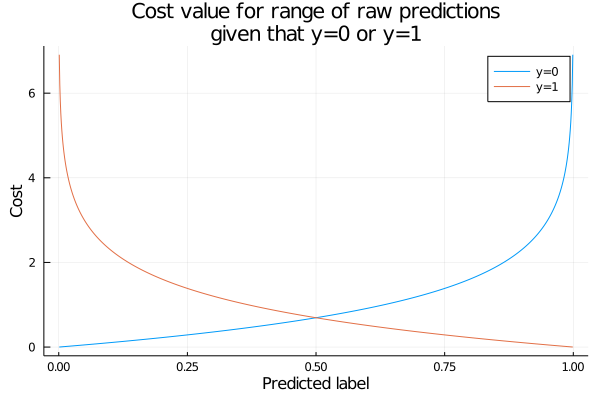

In [4]:
plot(X, cost(X, 0), label="y=0")
plot!(X, cost(X, 1), label="y=1")
xlabel!("Predicted label")
ylabel!("Cost")
title!("Cost value for range of raw predictions\ngiven that y=0 or y=1")

\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}